# Year 2023 Day 23

[--- Day 23: A Long Walk ---](https://adventofcode.com/2023/day/23)


In [1]:
from advent_of_code.common.common import get_puzzle_input_file_path
from advent_of_code.y_2023.problem_202323 import AdventOfCodeProblem202323
from advent_of_code.y_2023.problem_202323 import (
    bruteforce_paths_in_exploration_tree,
    create_flatset,
)
from advent_of_code.common.store import ExampleInputsStore

from advent_of_code.common.graph_visualization import construct_dot_graph_from_dict
from advent_of_code.y_2023.problem_202323 import create_flat_simplified

## Test data


### Part 1


In [2]:
EXAMPLE_INPUT = ExampleInputsStore.from_private_resources_repository(2023).retrieve(
    "test_problem_202323"
)

In [3]:
text = EXAMPLE_INPUT
parsed = AdventOfCodeProblem202323.parse_text_input(text)

In [4]:
from advent_of_code.y_2023.problem_202323 import (
    compute_exploration_tree,
    flatten_exploration_tree,
)


hiking_trail = hk = parsed
starting_position = (1, 2)

tree = compute_exploration_tree(hk, starting_position)
flat = flatten_exploration_tree(tree)

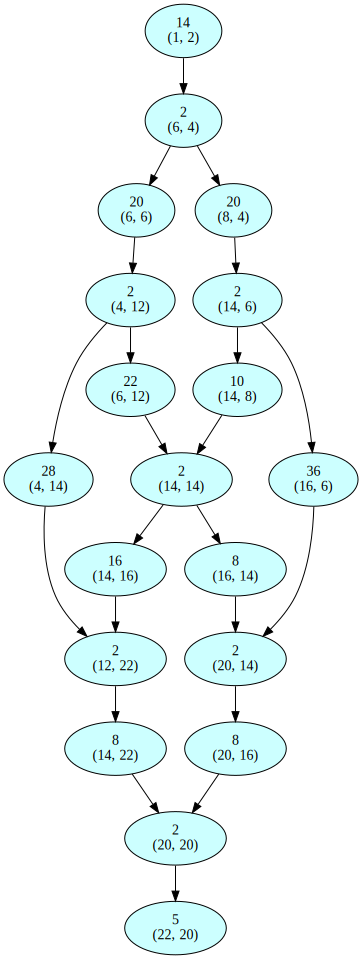

In [5]:
flat_simplified = create_flat_simplified(flat)
dot = construct_dot_graph_from_dict(flat_simplified)
dot

In [6]:
bf = bruteforce_paths_in_exploration_tree(tree, 0)

In [7]:
bf

[[83, [95, 87]], [[83, 75], 91]]

In [8]:
import re

# It works ^^
flattened = [int(c) for c in re.findall(r"\d+", str(bf))]
flattened

[83, 95, 87, 83, 75, 91]

In [9]:
import numpy as np

np.array(list(reversed(sorted(flattened)))) - 1

array([94, 90, 86, 82, 82, 74])

### Part 2

Assumption: In Part 1, we already explored all paths. The explored graph
should be reusable and transformed into an undirected graph. No need to backtrack.
Note: if bugs arise, verify more formally this assumption.


In [10]:
from advent_of_code.y_2023.problem_202323 import (
    create_flat_simplified_tuple,
    make_undirected_graph,
)


flat = create_flat_simplified_tuple(flat)
couples = make_undirected_graph(flat, bidirectional=True)
couples_for_visu = make_undirected_graph(flat, bidirectional=False)
couples_mapping = {t[0]: t[1] for t in couples}
couples_mapping

{(14, (1, 2)): (2, (6, 4)),
 (2, (6, 4)): (14, (1, 2)),
 (20, (6, 6)): (2, (6, 4)),
 (20, (8, 4)): (2, (6, 4)),
 (2, (4, 12)): (20, (6, 6)),
 (2, (14, 6)): (20, (8, 4)),
 (28, (4, 14)): (2, (4, 12)),
 (22, (6, 12)): (2, (4, 12)),
 (10, (14, 8)): (2, (14, 6)),
 (36, (16, 6)): (2, (14, 6)),
 (2, (12, 22)): (16, (14, 16)),
 (2, (14, 14)): (10, (14, 8)),
 (2, (20, 14)): (8, (16, 14)),
 (8, (14, 22)): (2, (12, 22)),
 (16, (14, 16)): (2, (14, 14)),
 (8, (16, 14)): (2, (14, 14)),
 (8, (20, 16)): (2, (20, 14)),
 (2, (20, 20)): (8, (20, 16)),
 (5, (22, 20)): (2, (20, 20))}

In [11]:
flat

{(14, (1, 2)): [(2, (6, 4))],
 (2, (6, 4)): [(20, (6, 6)), (20, (8, 4))],
 (20, (6, 6)): [(2, (4, 12))],
 (20, (8, 4)): [(2, (14, 6))],
 (2, (4, 12)): [(28, (4, 14)), (22, (6, 12))],
 (2, (14, 6)): [(10, (14, 8)), (36, (16, 6))],
 (28, (4, 14)): [(2, (12, 22))],
 (22, (6, 12)): [(2, (14, 14))],
 (10, (14, 8)): [(2, (14, 14))],
 (36, (16, 6)): [(2, (20, 14))],
 (2, (12, 22)): [(8, (14, 22))],
 (2, (14, 14)): [(16, (14, 16)), (8, (16, 14))],
 (2, (20, 14)): [(8, (20, 16))],
 (8, (14, 22)): [(2, (20, 20))],
 (16, (14, 16)): [(2, (12, 22))],
 (8, (16, 14)): [(2, (20, 14))],
 (8, (20, 16)): [(2, (20, 20))],
 (2, (20, 20)): [(5, (22, 20))],
 (5, (22, 20)): []}

In [12]:
create_flatset(flat)

{(14, (1, 2)): {(2, (6, 4))},
 (2, (6, 4)): {(14, (1, 2)), (20, (6, 6)), (20, (8, 4))},
 (20, (6, 6)): {(2, (4, 12)), (2, (6, 4))},
 (20, (8, 4)): {(2, (6, 4)), (2, (14, 6))},
 (2, (4, 12)): {(20, (6, 6)), (22, (6, 12)), (28, (4, 14))},
 (2, (14, 6)): {(10, (14, 8)), (20, (8, 4)), (36, (16, 6))},
 (28, (4, 14)): {(2, (4, 12)), (2, (12, 22))},
 (22, (6, 12)): {(2, (4, 12)), (2, (14, 14))},
 (10, (14, 8)): {(2, (14, 6)), (2, (14, 14))},
 (36, (16, 6)): {(2, (14, 6)), (2, (20, 14))},
 (2, (12, 22)): {(8, (14, 22)), (16, (14, 16)), (28, (4, 14))},
 (2, (14, 14)): {(8, (16, 14)), (10, (14, 8)), (16, (14, 16)), (22, (6, 12))},
 (2, (20, 14)): {(8, (16, 14)), (8, (20, 16)), (36, (16, 6))},
 (8, (14, 22)): {(2, (12, 22)), (2, (20, 20))},
 (16, (14, 16)): {(2, (12, 22)), (2, (14, 14))},
 (8, (16, 14)): {(2, (14, 14)), (2, (20, 14))},
 (8, (20, 16)): {(2, (20, 14)), (2, (20, 20))},
 (2, (20, 20)): {(5, (22, 20)), (8, (14, 22)), (8, (20, 16))},
 (5, (22, 20)): {(2, (20, 20))}}

In [13]:
len(flat)

19

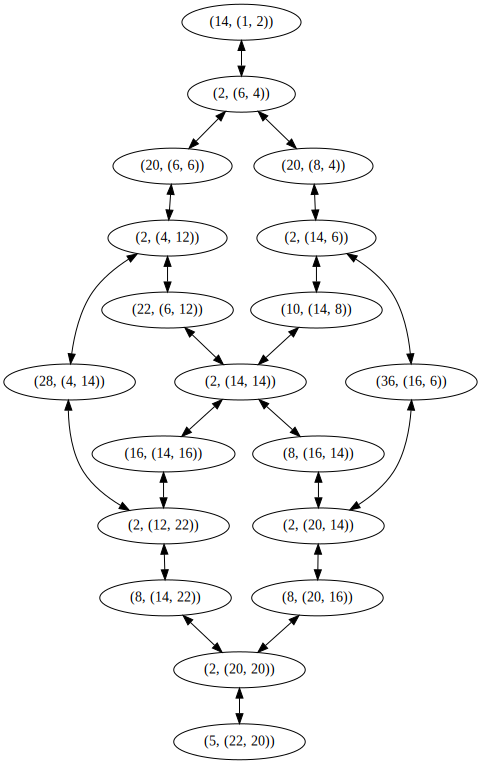

In [14]:
from advent_of_code.common.graph_visualization import construct_dot_graph_from_couples


visu = construct_dot_graph_from_couples(couples_for_visu)
visu

## Actual data


### Part 1


In [15]:
text = (get_puzzle_input_file_path(2023, 23)).read_text()
parsed = AdventOfCodeProblem202323.parse_text_input(text)

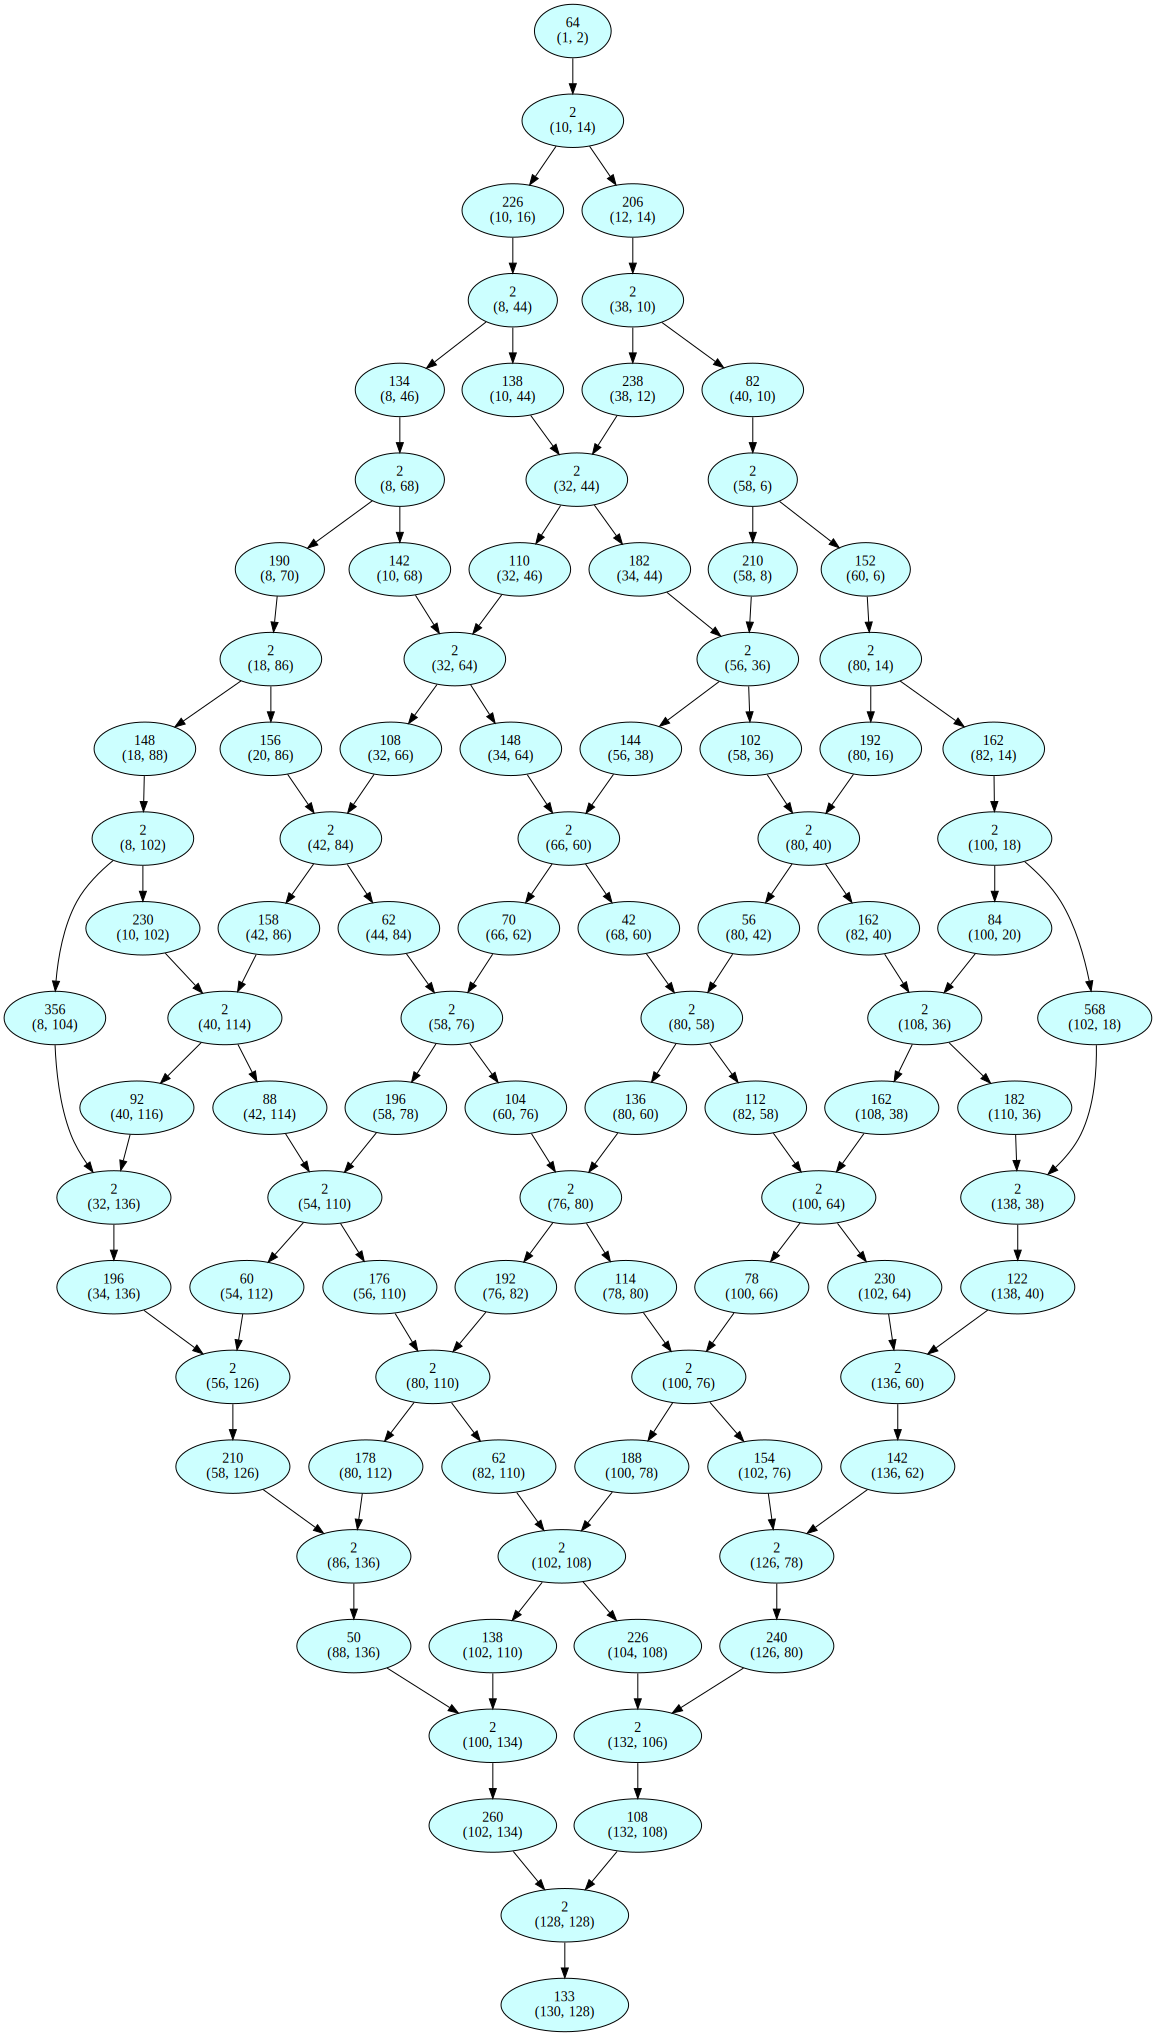

In [16]:
hiking_trail = hk = parsed
starting_position = (1, 2)

tree = compute_exploration_tree(hk, starting_position)
flat = flatten_exploration_tree(tree)
flat_simplified = create_flat_simplified(flat)
dot = construct_dot_graph_from_dict(flat_simplified)
dot

### Part 2


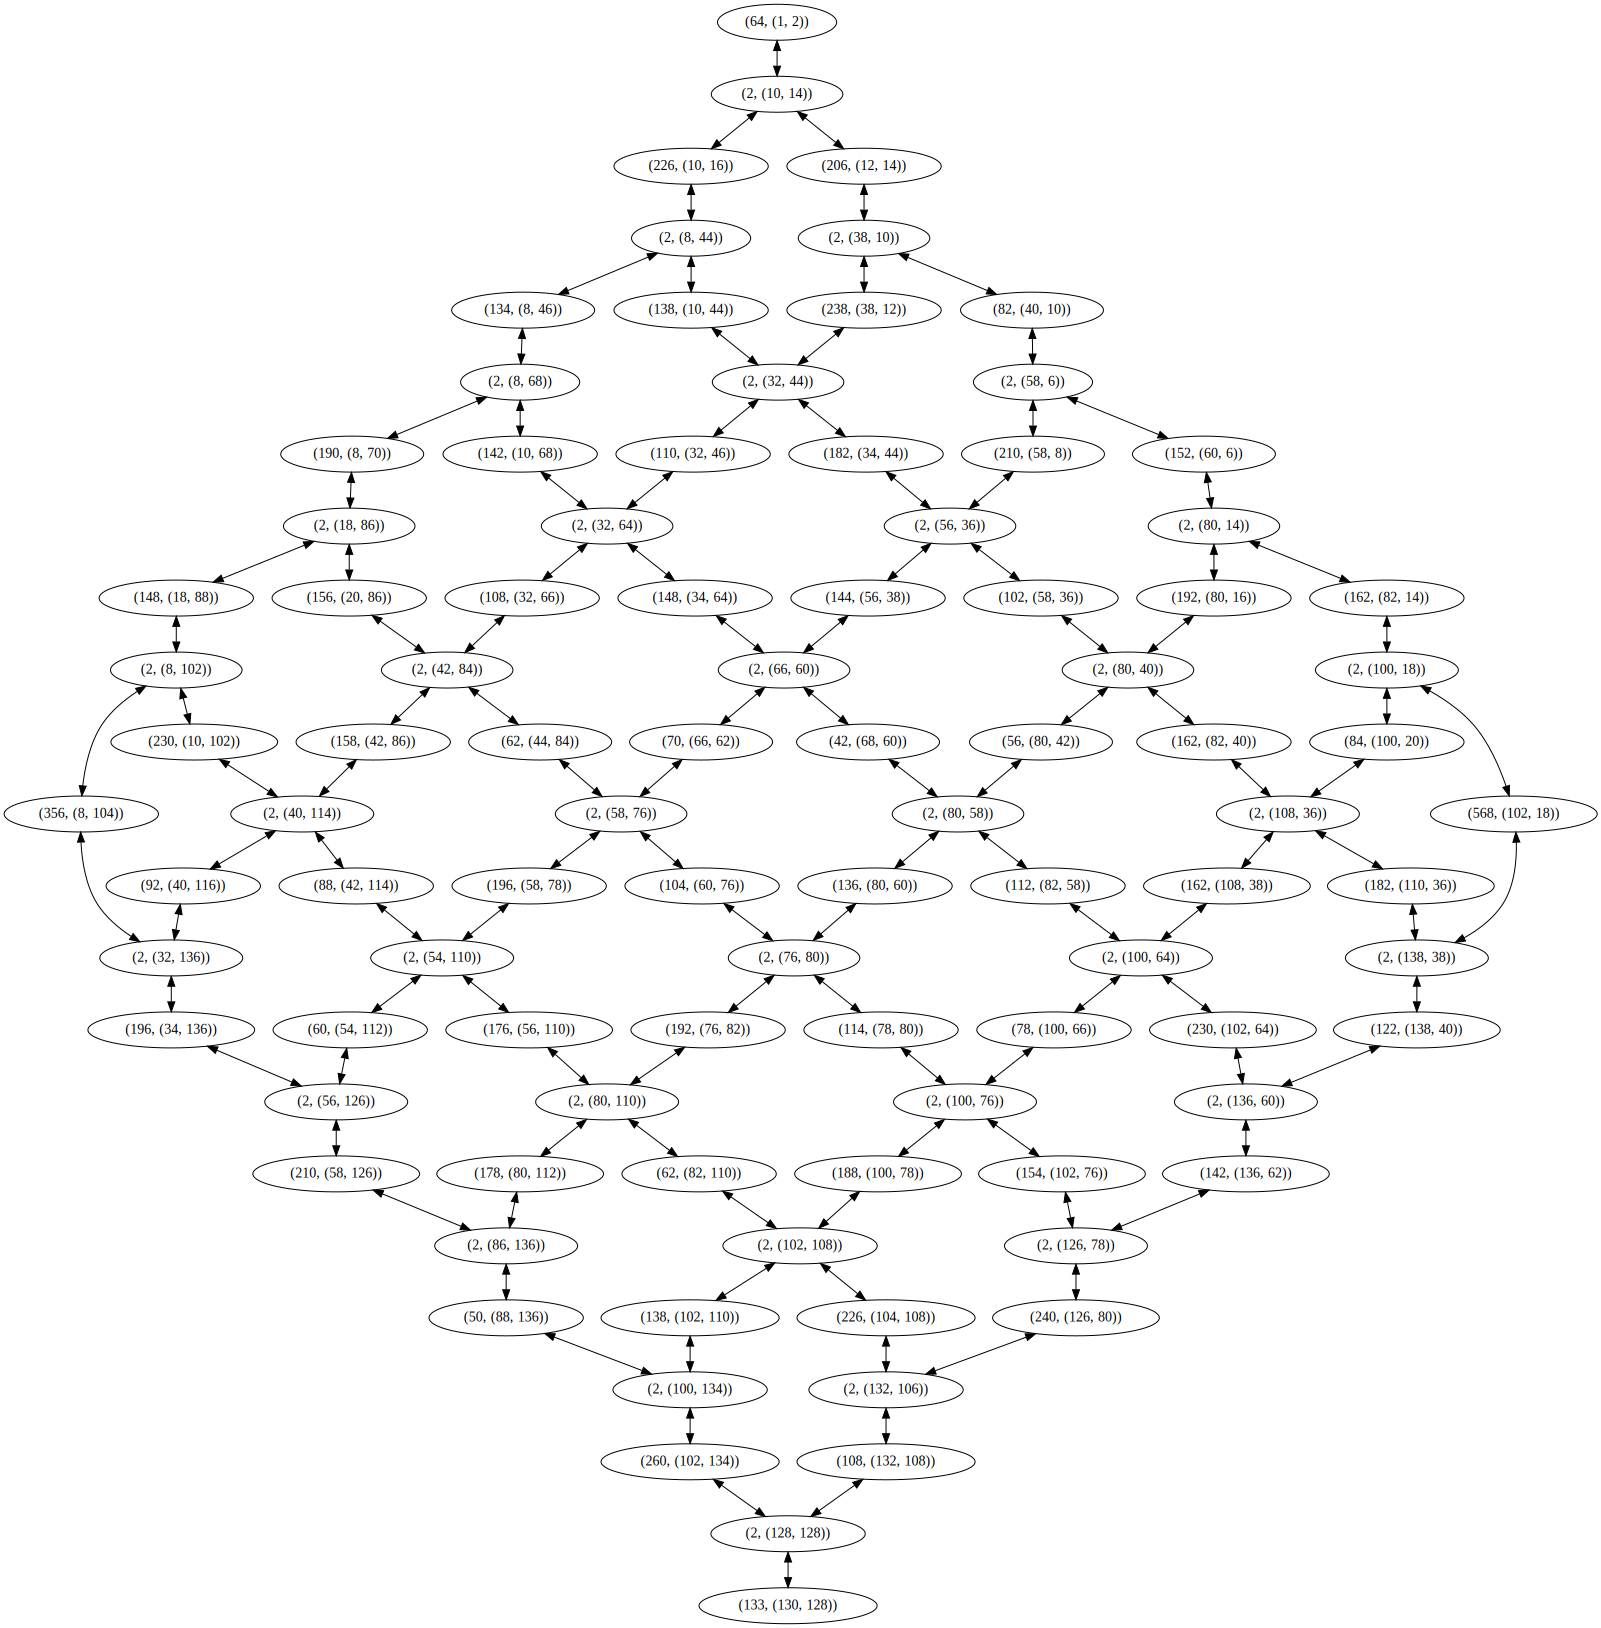

In [17]:
flat = create_flat_simplified_tuple(flat)
couples = make_undirected_graph(flat, bidirectional=True)
couples_for_visu = make_undirected_graph(flat, bidirectional=False)


visu = construct_dot_graph_from_couples(couples_for_visu)
visu